# Creating replicates of an experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../src")

from stochastic_glv_generator import *
from experiments import *

## Generating replicates

In [2]:
n = 5
seed = 1
r_max = 1.
A_diag_std = 1.
A_off_diag_std = 10.

p = sort_glv_params(n, seed, r_max, A_diag_std, A_off_diag_std)
r = p[:n]
A = p[n:].reshape((n, n))
x_eq = -np.linalg.inv(A)@r
print(x_eq)

np.random.seed(1)
init_perturb = np.random.choice([-1., 1.], n)*np.random.uniform(0.3, 0.6, n)
perturb_scale_list = np.array([0.5, 1., 2.])
t_samp_list = [np.sort(np.random.uniform(0, 20, 100)) for i in range(10)]
meas_noise_list = np.array([0.01])
repetitions = 1

env_noise = 0.05
t0 = 0
dt = 1e-2

replicates = gen_replicates(p, env_noise, init_perturb, perturb_scale_list, t0, dt, t_samp_list, meas_noise_list, repetitions, seed=0, scale_meas_noise_by_abund=True, save_datasets=True)
replicates

new matrix 2[0.15229594 0.2937585  0.04524194 0.08828342 0.078074  ]
30/30                                                                                               

,dataset,perturbation_scale,measurement_noise,time,sp1,sp2,sp3,sp4,sp5
0,0.0,0.5,0.01,0.180160,0.174603,0.364285,0.037590,0.069205,0.095466
1,0.0,0.5,0.01,0.233384,0.174577,0.354012,0.037600,0.069773,0.095762
2,0.0,0.5,0.01,0.596027,0.171775,0.337462,0.039634,0.073321,0.092246
3,0.0,0.5,0.01,0.683426,0.170727,0.343619,0.038598,0.072515,0.093014
4,0.0,0.5,0.01,0.906915,0.167404,0.330299,0.039519,0.075300,0.087413
...,...,...,...,...,...,...,...,...,...
2995,29.0,2.0,0.01,19.162802,0.149741,0.290694,0.039518,0.081373,0.064081
2996,29.0,2.0,0.01,19.350342,0.152370,0.282300,0.039793,0.079905,0.063901
2997,29.0,2.0,0.01,19.591544,0.152183,0.276407,0.039065,0.080339,0.064460
2998,29.0,2.0,0.01,19.829604,0.151069,0.284014,0.039770,0.080773,0.063637


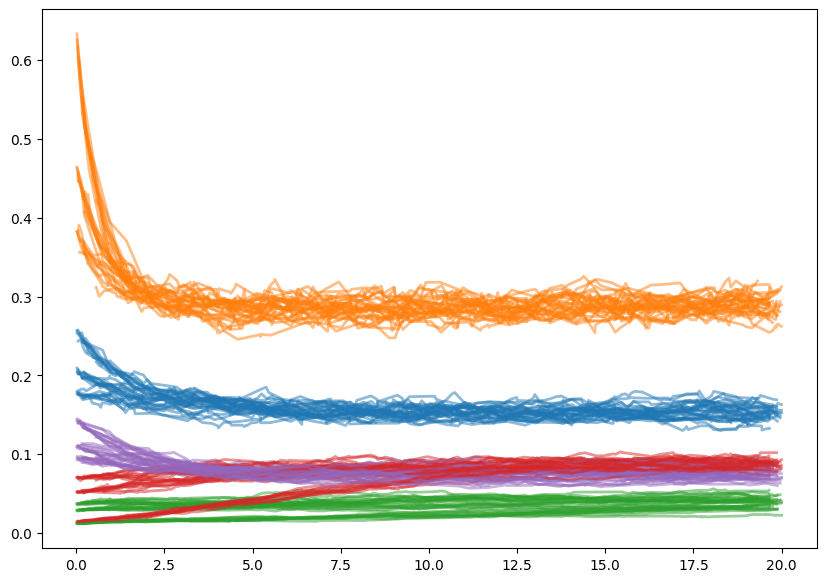

In [3]:
n_sp = sum(["sp" in col for col in replicates.columns])

plt.figure(figsize=(10, 7))
for dataset_num in replicates.dataset.unique():
    for sp in range(n):
        plt.plot(replicates[replicates.dataset==dataset_num].time, replicates[replicates.dataset==dataset_num][f"sp{sp+1}"], "-", c=f"C{sp}", lw=2, alpha=0.5)